# Step 1. Importing Libraries and Getting the Data

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Data Importing
df = pd.read_csv("adult.csv")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Step 2. Exploring Data And Visualizing Data

In [5]:
# Seperating the categorical and numerical columns
obj_column = df.dtypes[df.dtypes == 'object']
num_column = df.dtypes[df.dtypes == 'int64']

In [6]:
for col in list(obj_column.index):
    print(f"****************** {col.title()} ******************")
    total = df[col].value_counts()
    percentage = df[col].value_counts()/ df.shape[0]
    dataset = pd.concat([total, percentage], keys = ['total count', 'percentage'], axis = 1)
    print(dataset)
    print('\n')

****************** Workclass ******************
                  total count  percentage
Private                 22696    0.697030
Self-emp-not-inc         2541    0.078038
Local-gov                2093    0.064279
?                        1836    0.056386
State-gov                1298    0.039864
Self-emp-inc             1116    0.034274
Federal-gov               960    0.029483
Without-pay                14    0.000430
Never-worked                7    0.000215


****************** Education ******************
              total count  percentage
HS-grad             10501    0.322502
Some-college         7291    0.223918
Bachelors            5355    0.164461
Masters              1723    0.052916
Assoc-voc            1382    0.042443
11th                 1175    0.036086
Assoc-acdm           1067    0.032769
10th                  933    0.028654
7th-8th               646    0.019840
Prof-school           576    0.017690
9th                   514    0.015786
12th                  433 

In [7]:
# to replace ? with null
change_cols = ['workclass', 'occupation', 'native.country']
for col in change_cols:
    df.loc[df[col] == '?', col] = 'null'

In [8]:
# cross check
for col in change_cols:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")

? in workclass: 0
? in occupation: 0
? in native.country: 0


In [9]:
# merging and replacing elements in the list

school = ['HS-grad', '12th', '11th', '10th', '9th','1st-4th','5th-6th','7th-8th', 'Preschool']
df['education'].replace(to_replace = school, value = 'Schooling', inplace = True)
df['education'].replace(to_replace = ['Bachelors'], value = "Undergraduates", inplace = True)
df['education'].replace(to_replace = ['Masters'], value = "Post-Graduates", inplace = True)
df['education'].value_counts()

Schooling         14754
Some-college       7291
Undergraduates     5355
Post-Graduates     1723
Assoc-voc          1382
Assoc-acdm         1067
Prof-school         576
Doctorate           413
Name: education, dtype: int64

In [10]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)
df['marital.status'].replace(to_replace = ['Never-married'], value = "Single", inplace = True)

df['marital.status'].value_counts()

Married      15417
Single       10683
Separated     5468
Widowed        993
Name: marital.status, dtype: int64

In [11]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

df['workclass'].replace(to_replace = self_employed ,value = 'Self-Employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt-Employees',inplace = True)
df['workclass'].replace(to_replace = ['Never-worked'], value = 'Unemployed', inplace = True)

df['workclass'].value_counts()

Private           22696
Govt-Employees     4351
Self-Employed      3657
null               1836
Without-pay          14
Unemployed            7
Name: workclass, dtype: int64

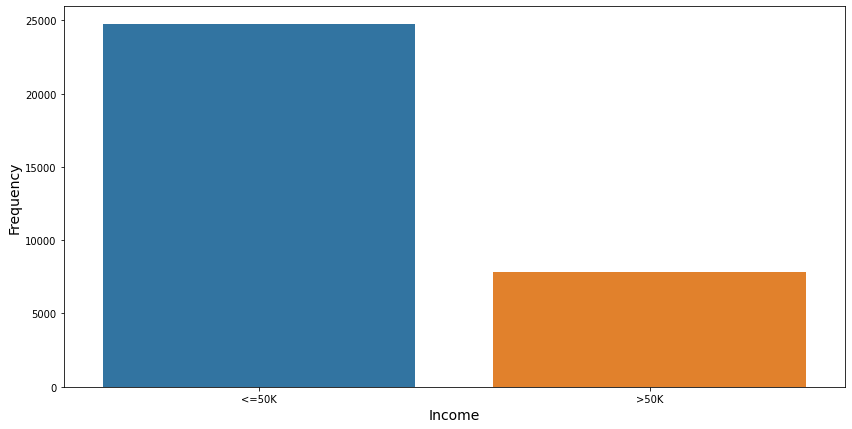

In [12]:
plt.figure(figsize=(14,7))
sns.countplot(x = 'income', data = df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.show()

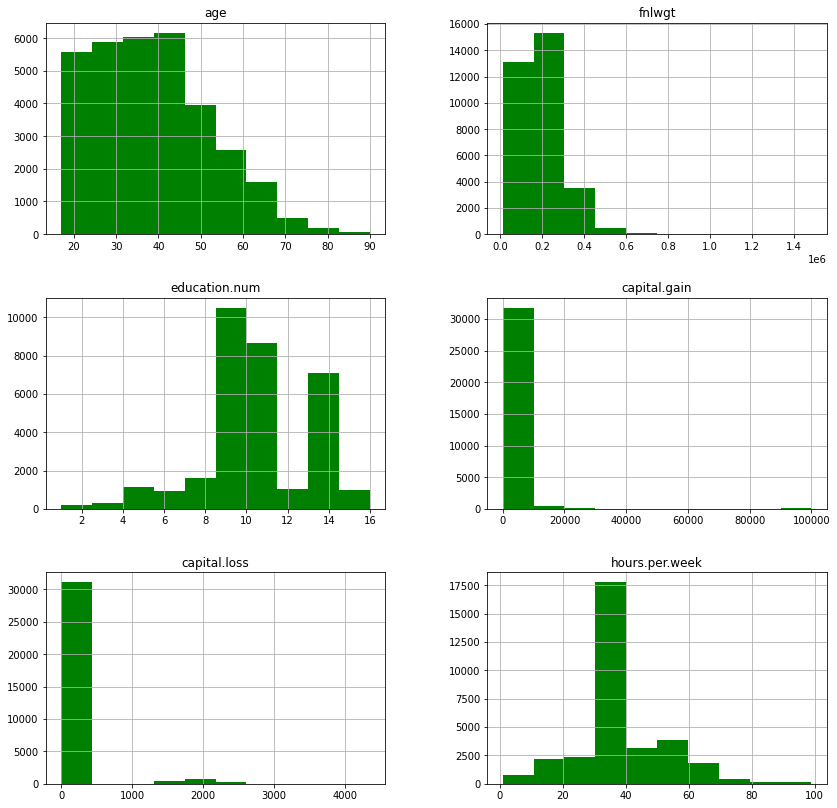

In [13]:
#distribution of population on the basis of numerical features
df[list(num_column.index)].hist(figsize = (14,14), color="green");

In [14]:
capital_loss = df[df['capital.loss']>0]
capital_gain = df[df['capital.gain']> 0]

print(f"Number of observations having capital loss above median value: {capital_loss.shape}\nNumber of observations in capital gain dataset above median value: {capital_gain.shape}")
print(f"Percentage of people having capital gain greater than median value: {(df.loc[df['capital.gain'] > 0,:].shape[0] / df.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(df.loc[df['capital.loss'] > 0,:].shape[0] / df.shape[0])*100:.4f}%")

Number of observations having capital loss above median value: (1519, 15)
Number of observations in capital gain dataset above median value: (2712, 15)
Percentage of people having capital gain greater than median value: 8.3290%
Percentage of people having capital loss greater than median value: 4.6651%


In [15]:
capital_gain_0= df[df['capital.loss'] > 0].loc[:,['capital.loss','capital.gain']].sample(10)

capital_loss_0 = df[df['capital.gain'] > 0].loc[:,['capital.loss','capital.gain']].sample(5)
print(capital_gain_0.head())
print(capital_loss_0.head())

      capital.loss  capital.gain
1472          1258             0
27            2603             0
172           2258             0
653           1902             0
146           2339             0
      capital.loss  capital.gain
2107             0         15024
1826             0         15024
1684             0         34095
2102             0         15024
2511             0          7688


In [16]:
print(f"Number of observations having capital gain and capital loss zero: {df[(df['capital.loss'] == 0) & (df['capital.gain'] == 0)].shape}")
for col in obj_column.index:
    print(f"*************** {col} ***************")
    print(df[(df['capital.loss'] == 0) & (df['capital.gain'] == 0)][col].value_counts())
    print("\n")

Number of observations having capital gain and capital loss zero: (28330, 15)
*************** workclass ***************
Private           19982
Govt-Employees     3714
Self-Employed      2960
null               1655
Without-pay          12
Unemployed            7
Name: workclass, dtype: int64


*************** education ***************
Schooling         13342
Some-college       6533
Undergraduates     4384
Post-Graduates     1300
Assoc-voc          1194
Assoc-acdm          930
Prof-school         363
Doctorate           284
Name: education, dtype: int64


*************** marital.status ***************
Married      12603
Single        9914
Separated     4934
Widowed        879
Name: marital.status, dtype: int64


*************** occupation ***************
Craft-repair         3593
Adm-clerical         3408
Prof-specialty       3290
Exec-managerial      3219
Sales                3138
Other-service        3122
Machine-op-inspct    1806
null                 1662
Transport-moving     1416
H

In [17]:
df.loc[df['capital.gain'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2712.000000,2.712000e+03,2712.000000,2712.000000,2712.0,2712.000000
mean,44.016224,1.880805e+05,11.066003,12938.541298,0.0,43.510324
std,13.268269,1.033775e+05,2.663273,22395.413530,0.0,12.207654
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.180670e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.759390e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.364735e+05,13.000000,14084.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


In [18]:
df.loc[df['capital.loss'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,185492.941409,10.969059,0.0,1871.428571,43.252798
std,12.625609,97621.521906,2.688426,0.0,376.571535,12.247258
min,17.000000,20953.000000,1.000000,0.0,155.000000,1.000000
25%,32.000000,118854.000000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,175109.000000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,228991.500000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000


In [19]:
print(f"Number of observations having capital gain of 99999:{df.loc[df['capital.gain'] == 99999,:].shape}")
print(f"Income counts: {df.loc[df['capital.gain'] == 99999,:]['income'].value_counts()}")

Number of observations having capital gain of 99999:(159, 15)
Income counts: >50K    159
Name: income, dtype: int64


In [20]:
print(f"Number of observations having capital loss of 4356:{df.loc[df['capital.loss'] == 4356,:].shape}")
print(f"Income counts: {df.loc[df['capital.loss'] == 4356,:]['income'].value_counts()}")

Number of observations having capital loss of 4356:(3, 15)
Income counts: <=50K    3
Name: income, dtype: int64


In [21]:
df.loc[df['capital.loss'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,185492.941409,10.969059,0.0,1871.428571,43.252798
std,12.625609,97621.521906,2.688426,0.0,376.571535,12.247258
min,17.000000,20953.000000,1.000000,0.0,155.000000,1.000000
25%,32.000000,118854.000000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,175109.000000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,228991.500000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000


In [22]:
print(f"Number of observations having capital loss of 4356:{df.loc[df['capital.loss'] == 4356,:].shape}")
print("\nIncome Distribution among people with capital loss above mean:")
print(f"Income counts:\n{df.loc[df['capital.loss'] >= 1871,:]['income'].value_counts()}")

Number of observations having capital loss of 4356:(3, 15)

Income Distribution among people with capital loss above mean:
Income counts:
>50K     658
<=50K    277
Name: income, dtype: int64


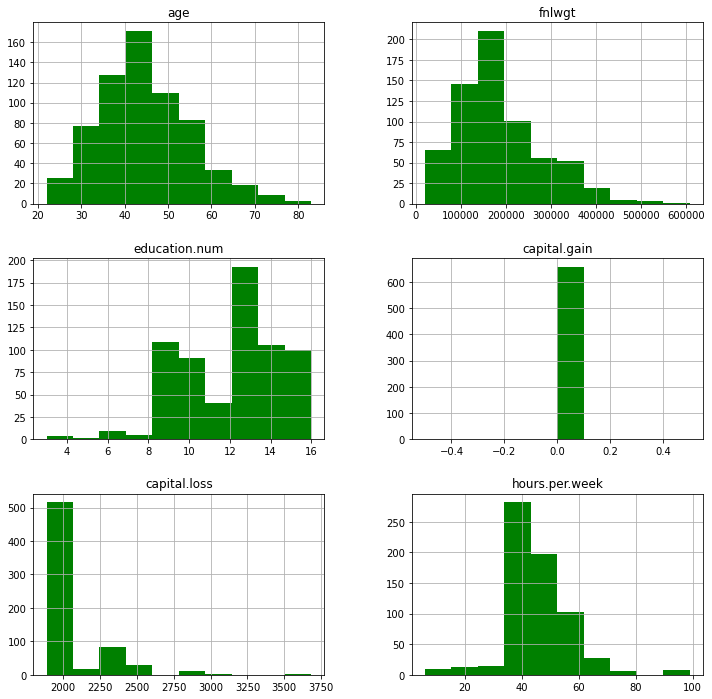

In [23]:
df[(df['capital.loss'] >= 1871) & (df['income'] == '>50K')].hist(figsize = (12,12), color="green");

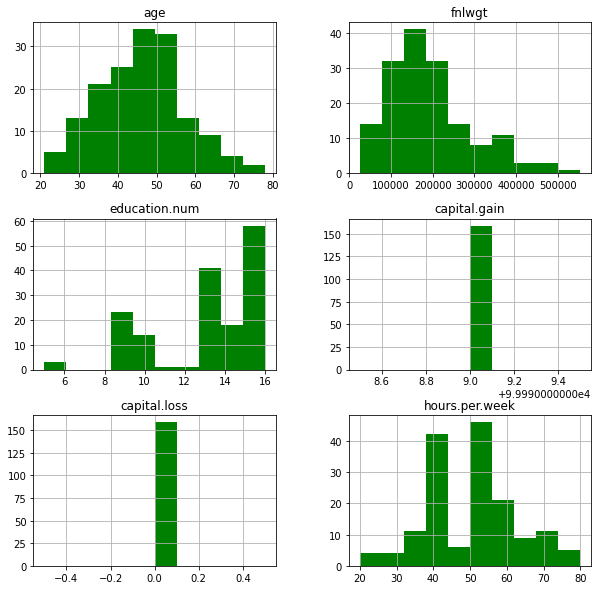

In [24]:
df.loc[df['capital.gain'] == 99999,:].hist(figsize = (10,10), color= "green");

In [25]:
occupation_table = pd.crosstab(df['occupation'],df['income'])
workclass_table = pd.crosstab(df['workclass'],df['income'])
education_table = pd.crosstab(df['education'],df['income'])
marital_table = pd.crosstab(df['marital.status'],df['income'])
race_table = pd.crosstab(df['race'],df['income'])
sex_table = pd.crosstab(df['sex'],df['income'])
country_table = pd.crosstab(df['native.country'],df['income'])

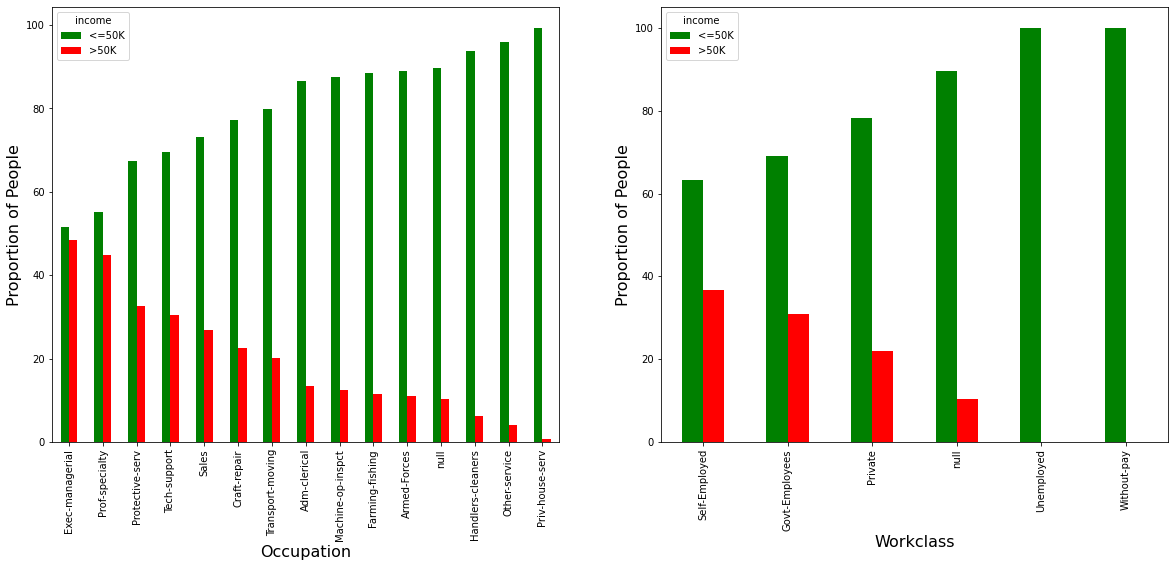

In [26]:
#plotting bar graph
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,2,1)
(occupation_table.div(occupation_table.sum(axis = 1), axis = 0)* 100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax, color=['green','red'])
plt.xlabel("Occupation",fontsize = 16);
plt.ylabel('Proportion of People',fontsize = 16);
ax = fig.add_subplot(1,2,2)
(workclass_table.div(workclass_table.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax, color=['green','red']);
plt.xlabel("Workclass",fontsize = 16);
plt.ylabel('Proportion of People',fontsize = 16);

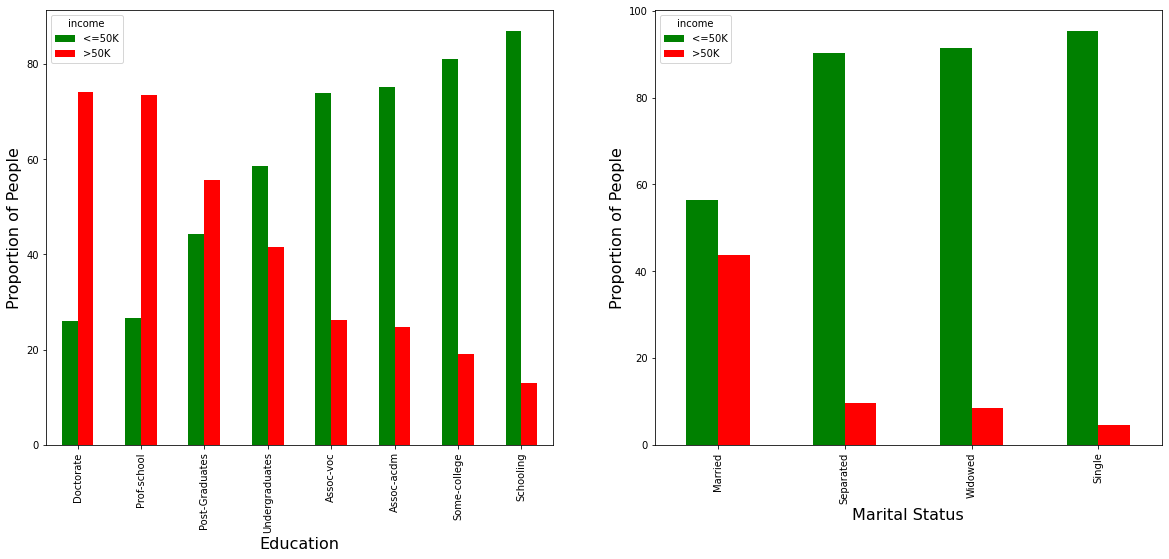

In [27]:
#plotting bar graph
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,2,1)
(education_table.div(education_table.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax, color=['green','red']);
plt.xlabel('Education',fontsize = 16);
plt.ylabel('Proportion of People',fontsize = 16);
ax = fig.add_subplot(1,2,2)
(marital_table.div(marital_table.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax, color=['green','red']);
plt.xlabel('Marital Status',fontsize = 16);
plt.ylabel('Proportion of People',fontsize = 16);

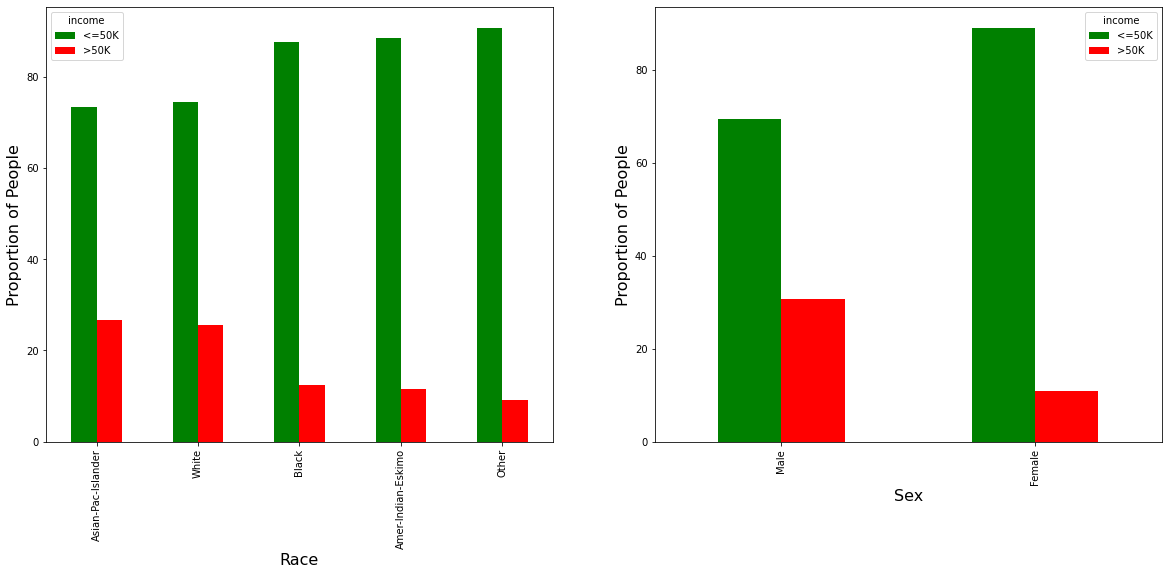

In [28]:
#plotting bar graph
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,2,1)
(race_table.div(race_table.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax, color=['green','red']);
plt.xlabel('Race',fontsize = 16);
plt.ylabel('Proportion of People',fontsize = 16);
ax = fig.add_subplot(1,2,2)
(sex_table.div(sex_table.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax, color=['green','red']);
plt.xlabel('Sex',fontsize = 16);
plt.ylabel('Proportion of People',fontsize = 16);

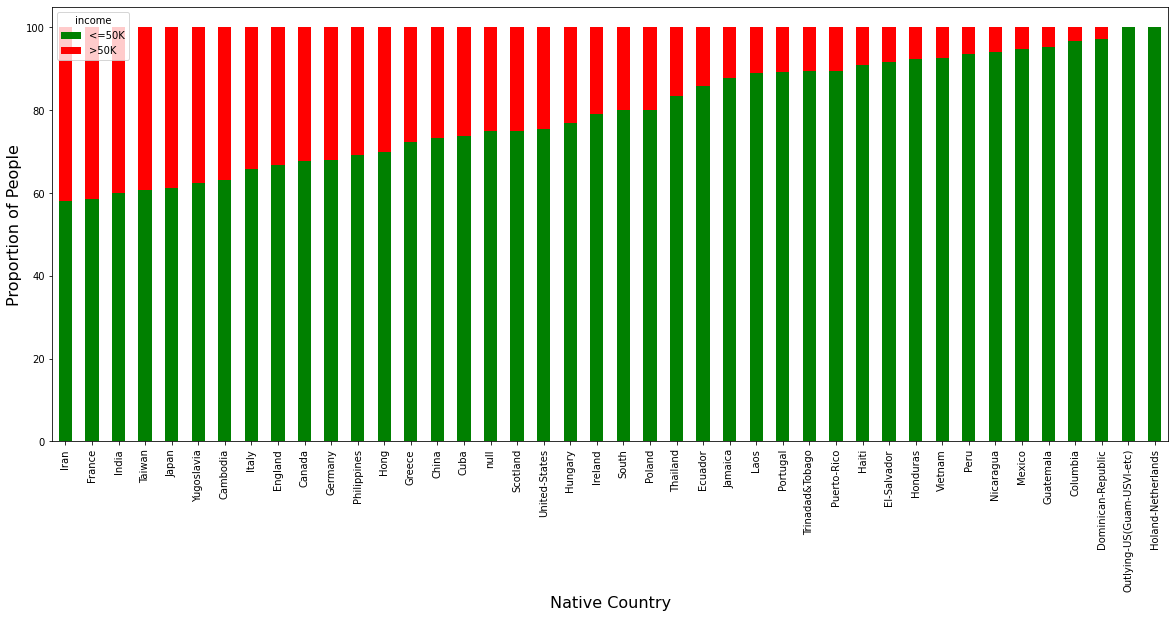

In [29]:
#plotting bar graph
country_table = pd.crosstab(df['native.country'],df['income'])
(country_table.div(country_table.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (20,8), color=['green','red']);
plt.xlabel('Native Country',fontsize = 16);
plt.ylabel('Proportion of People',fontsize = 16);

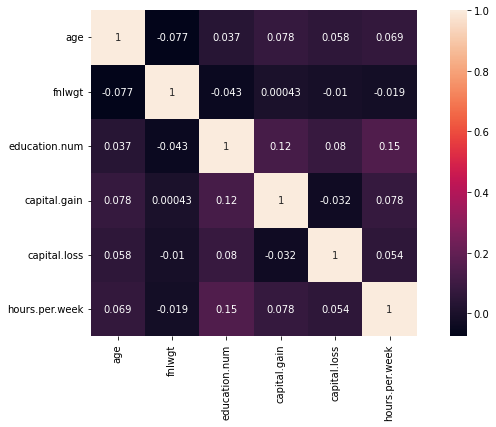

In [30]:
fig = plt.figure(figsize = (12,6))

sns.heatmap(df[list(num_column.index)].corr(),annot = True,square = True);


In [31]:
df.drop(['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week'], axis = 1, inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital.status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   native.country  32561 non-null  object
 8   income          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [33]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [34]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [35]:
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [36]:
marital = set(df['marital.status'])
marital

{'Married', 'Separated', 'Single', 'Widowed'}

In [37]:
df['marital.status'] = df['marital.status'].map({'Married': 0, 'Separated': 1, 
                                                             'Single': 2, 'Widowed': 3}).astype(int)

In [38]:
emp = set(df['workclass'])
print(emp)

{'null', 'Without-pay', 'Self-Employed', 'Unemployed', 'Govt-Employees', 'Private'}


In [39]:
df['workclass'] = df['workclass'].map({'Unemployed': 0, 'Private': 1, 
                                                             'Govt-Employees': 2, 'Self-Employed': 3, 'null': 4, 
                                                             'Without-pay': 5}).astype(int)

In [40]:
ed = set(df['education'])
print(ed)

{'Some-college', 'Assoc-acdm', 'Prof-school', 'Post-Graduates', 'Undergraduates', 'Schooling', 'Assoc-voc', 'Doctorate'}


In [41]:
df['education'] = df['education'].map({'Assoc-voc': 0, 'Schooling': 1, 
                                                        'Assoc-acdm': 2, 'Post-Graduates': 3, 'Doctorate': 4, 
                                                        'Some-college': 5, 'Prof-school': 6, 'Undergraduates': 7}).astype(int)

In [42]:
occupation = set(df['occupation'])
print(occupation)

{'null', 'Armed-Forces', 'Other-service', 'Tech-support', 'Priv-house-serv', 'Craft-repair', 'Farming-fishing', 'Exec-managerial', 'Transport-moving', 'Handlers-cleaners', 'Machine-op-inspct', 'Sales', 'Protective-serv', 'Adm-clerical', 'Prof-specialty'}


In [43]:
df['occupation'] = df['occupation'].map({ 'Transport-moving': 1, 'Protective-serv': 2, 
                                          'Craft-repair': 3, 'Prof-specialty': 4, 
                                         'Machine-op-inspct': 5,'Tech-support': 6, 
                                         'Exec-managerial': 7, 
                                         'Farming-fishing': 8,
                                         'Priv-house-serv': 9, 
                                         'Handlers-cleaners': 10, 
                                         'Other-service': 11, 
                                         'Armed-Forces': 12, 
                                         'null': 13,  
                                         'Adm-clerical': 14, 'Sales': 15}).astype(int)

In [44]:
relationship = set(df['relationship'])
print(relationship)

{'Unmarried', 'Husband', 'Other-relative', 'Wife', 'Own-child', 'Not-in-family'}


In [45]:
df['relationship'] = df['relationship'].map({'Own-child': 0, 'Not-in-family': 1, 
                                                             'Wife': 2, 
                                                             'Husband': 3, 
                                                             'Unmarried': 4, 
                                                             'Other-relative': 5}).astype(int)

In [46]:
df

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,4,1,3,13,1,3,1,United-States,0
1,1,1,3,7,1,3,1,United-States,0
2,4,5,3,13,4,0,1,United-States,0
3,1,1,1,5,4,3,1,United-States,0
4,1,5,1,4,0,3,1,United-States,0
...,...,...,...,...,...,...,...,...,...
32556,1,5,2,2,1,3,0,United-States,0
32557,1,2,0,6,2,3,1,United-States,0
32558,1,1,0,5,3,3,0,United-States,1
32559,1,1,3,14,4,3,1,United-States,0


In [47]:
df.drop(['native.country'], axis = 1, inplace = True)

In [48]:
df

,workclass,education,marital.status,occupation,relationship,race,sex,income
0,4,1,3,13,1,3,1,0
1,1,1,3,7,1,3,1,0
2,4,5,3,13,4,0,1,0
3,1,1,1,5,4,3,1,0
4,1,5,1,4,0,3,1,0
...,...,...,...,...,...,...,...,...
32556,1,5,2,2,1,3,0,0
32557,1,2,0,6,2,3,1,0
32558,1,1,0,5,3,3,0,1
32559,1,1,3,14,4,3,1,0


In [49]:
Y = df['income']
X = df.drop(['income'], axis = 1)

In [50]:
dfx = pd.DataFrame(X)
dfy = pd.DataFrame(Y)

In [51]:
# Splitting the data in the ratio 3:1 where 3 is for training data and 1 is for testing data
X_train, X_test, Y_train, Y_test = train_test_split(dfx, dfy, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24420, 7)
(8141, 7)
(24420, 1)
(8141, 1)


### Logistic Regression

In [52]:
# Using Logistic Regression
operation1 = LogisticRegression()
# Train our model with the training data
operation1.fit(X_train, Y_train)
Y_pred = operation1.predict(X_test)

In [53]:
score1 = accuracy_score(Y_test, Y_pred)
print("Prediction Accuracy = " + str(score1*100))

Prediction Accuracy = 78.92150841419972


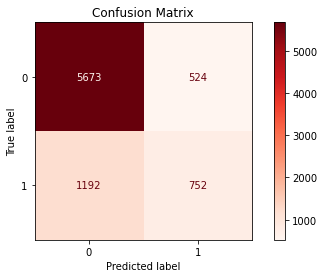

In [54]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(8,4))
plot_confusion_matrix(operation1, X_test, Y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

### Decision Tree Classifier

In [58]:
operation2 = DecisionTreeClassifier()
operation2.fit(X_train, Y_train)
Y_pred = operation2.predict(X_test)

In [59]:
score2 = accuracy_score(Y_test, Y_pred)
print('Prediction Accuracy = ' + str(score2*100))

Prediction Accuracy = 82.01695123449207


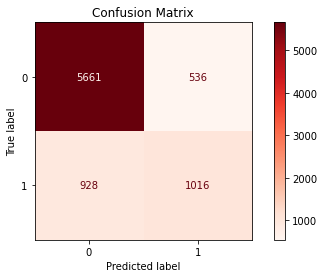

In [60]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(8,4))
plot_confusion_matrix(operation2, X_test, Y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

### Naive Bayes Classifier

In [61]:
operation3 = GaussianNB()
operation3.fit(X_train, Y_train)
Y_pred = operation3.predict(X_test)

In [62]:
score3 = accuracy_score(Y_test, Y_pred)
print('Prediction Accuracy = ' + str(score3*100))

Prediction Accuracy = 72.153298120624


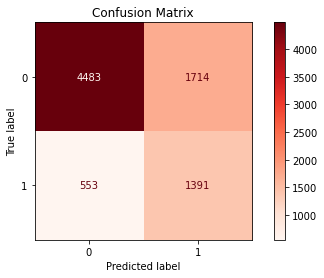

In [63]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(8,4))
plot_confusion_matrix(operation3, X_test, Y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

### Random Forest

In [64]:
operation4 = RandomForestClassifier()
operation4.fit(X_train, Y_train)
Y_pred = operation4.predict(X_test)

In [65]:
score4 = accuracy_score(Y_test, Y_pred)
print('Prediction Accuracy = ' + str(score4*100))

Prediction Accuracy = 82.36088932563567


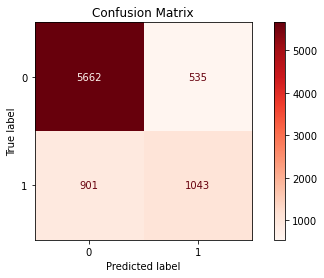

In [66]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(8,4))
plot_confusion_matrix(operation4, X_test, Y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

### Support Vector Machine

In [67]:
operation5 = SVC()
operation5.fit(X_train, Y_train)
Y_pred = operation5.predict(X_test)

In [68]:
score5 = accuracy_score(Y_test, Y_pred)
print('Prediction Accuracy = ' + str(score5*100))

Prediction Accuracy = 80.75175039921385


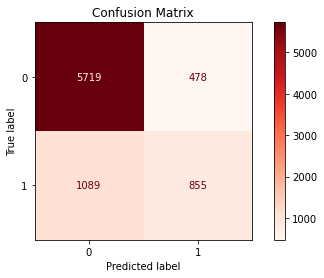

In [69]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(8,4))
plot_confusion_matrix(operation5, X_test, Y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

Hence Random Forest Algorithm gives the best accuracy score

## Fine Tuning the Model

In [70]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

In [71]:
operation6 = RandomForestClassifier()

In [72]:
grid = GridSearchCV(estimator = operation6, param_grid = param_grid, cv = 3, verbose=2)
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time= 

[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_lea

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_lea

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_le

[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_lea

[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=4, max_features=auto, min_samples_le

[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_lea

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [73]:
# Getting the best parameters for the random forest algorithm
grid.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 40}

In [74]:
# Creating the model with the best params
final_operation = RandomForestClassifier(max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=5,n_estimators=40)

In [75]:
final_operation.fit(X_train,Y_train)
Y_pred = final_operation.predict(X_test)

In [76]:
final_score = accuracy_score(Y_test, Y_pred)
print('Final Prediction Accuracy = ' + str(final_score*100))

Final Prediction Accuracy = 81.19395651639849


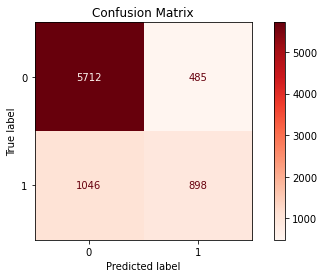

In [77]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(8,4))
plot_confusion_matrix(final_operation, X_test, Y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

## Cross Validation

In [78]:
def CrossValidationScore(operation_list):
    global dfx,dfy
    
    mean = []
    operation_name = []
    
    for operation in operation_list:
        operation_name.append(type(operation).__name__)
        
    for i in operation_list:
        scores = cross_val_score(i, dfx, dfy, cv=5)
        mean.append(scores.mean())
        
    cvs = pd.DataFrame({"Operation Name":operation_name,"CVS":mean})
    return cvs.style.background_gradient("Blues")

In [79]:
operation_list = [operation1,operation2,operation3,operation4,operation5,final_operation]

In [80]:
CrossValidationScore(operation_list)

,Operation Name,CVS
0,LogisticRegression,0.789349
1,DecisionTreeClassifier,0.817911
2,GaussianNB,0.723443
3,RandomForestClassifier,0.821443
4,SVC,0.811677
5,RandomForestClassifier,0.815945
